In [1]:
import pandas as pd

# Load the CSV data into a DataFrame
portfolio_data = pd.read_csv('portfolio_data.csv')

# Display general info using describe
portfolio_data.describe()


,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [2]:
# Check for missing values
if portfolio_data.isnull().sum().any():
    print("Missing values found, filling them with forward fill.")
    portfolio_data.fillna(method='ffill', inplace=True)

# Convert 'Data' column to datetime format, handle possible errors with 'coerce'
portfolio_data['Data'] = pd.to_datetime(portfolio_data['Data'], format='%m/%d/%Y', errors='coerce')

# Optionally, infer format if dates are inconsistent
# portfolio_data['Data'] = pd.to_datetime(portfolio_data['Data'], infer_datetime_format=True, errors='coerce')


In [3]:
# Ensure all entries in 'Data' are strings, then strip whitespace
portfolio_data['Data'] = portfolio_data['Data'].astype(str).str.strip()

# Convert to datetime, handling errors
portfolio_data['Data'] = pd.to_datetime(portfolio_data['Data'], errors='coerce')

# Check for parsing errors again
if portfolio_data['Data'].isnull().sum() > 0:
    print("Some dates could not be parsed. Here are the affected rows:")
    print(portfolio_data[portfolio_data['Data'].isnull()])


Some dates could not be parsed. Here are the affected rows:
     Data         AMZN         DPZ          BTC        NFLX
0     NaT   248.229996   51.190983   106.250000   30.415714
1     NaT   252.550003   51.987320    98.099998   30.641428
2     NaT   258.049988   52.446388   112.900002   30.492857
3     NaT   255.720001   53.205257   109.599998   30.098572
4     NaT   257.730011   54.151505   113.199997   29.464285
...   ...          ...         ...          ...         ...
1513  NaT  1950.550049  282.019989  5819.569824  378.670013
1514  NaT  1921.000000  277.390015  5998.709961  370.459991
1515  NaT  1917.770020  283.149994  6171.959961  364.369995
1516  NaT  1899.869995  282.160004  6358.290039  362.750000
1517  NaT  1889.979980  278.369995  7191.359863  361.040009

[605 rows x 5 columns]


In [4]:
# Ensure all entries in 'Data' are strings, then strip whitespace
portfolio_data['Data'] = portfolio_data['Data'].astype(str).str.strip()
portfolio_data['Data'] = pd.to_datetime(portfolio_data['Data'], errors='coerce', infer_datetime_format=True)
# Convert only if entries are not datetime, then parse
if portfolio_data['Data'].dtype != 'datetime64[ns]':
    portfolio_data['Data'] = pd.to_datetime(portfolio_data['Data'], errors='coerce', infer_datetime_format=True)


C:\Users\Vadde Vaishnavi\AppData\Local\Temp\ipykernel_29560\1621459448.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  portfolio_data['Data'] = pd.to_datetime(portfolio_data['Data'], errors='coerce', infer_datetime_format=True)


In [5]:
# Check for any parsing errors in the 'Data' column
if portfolio_data['Data'].isnull().sum() > 0:
    print("Some dates could not be parsed. Here are the affected rows:")
    print(portfolio_data[portfolio_data['Data'].isnull()])


Some dates could not be parsed. Here are the affected rows:
     Data         AMZN         DPZ          BTC        NFLX
0     NaT   248.229996   51.190983   106.250000   30.415714
1     NaT   252.550003   51.987320    98.099998   30.641428
2     NaT   258.049988   52.446388   112.900002   30.492857
3     NaT   255.720001   53.205257   109.599998   30.098572
4     NaT   257.730011   54.151505   113.199997   29.464285
...   ...          ...         ...          ...         ...
1513  NaT  1950.550049  282.019989  5819.569824  378.670013
1514  NaT  1921.000000  277.390015  5998.709961  370.459991
1515  NaT  1917.770020  283.149994  6171.959961  364.369995
1516  NaT  1899.869995  282.160004  6358.290039  362.750000
1517  NaT  1889.979980  278.369995  7191.359863  361.040009

[605 rows x 5 columns]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# List of tech stock symbols
tech_list = ['DPZ', 'BTC-USD', 'NFLX', 'AMZN']  # BTC-USD for Bitcoin

# Set up end and start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Dictionary to store stock data for each company
stock_data = {}

# Fetch stock data for each company in the list using yf.download
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

# Print out the retrieved data for verification
for stock, data in stock_data.items():
    if data.empty:
        print(f"No data found for {stock}")
    else:
        print(f"Data for {stock}:")
        print(data.head())  # Print the first few rows of the DataFrame

# Note: Adjust company names based on the correct stock symbols
company_names = ["Domino's Pizza", "Bitcoin", "Netflix", "Amazon"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for DPZ:
Price                       Adj Close       Close        High         Low  \
Ticker                            DPZ         DPZ         DPZ         DPZ   
Date                                                                        
2023-10-30 00:00:00+00:00  334.355774  338.709991  343.369995  334.279999   
2023-10-31 00:00:00+00:00  334.632141  338.989990  341.720001  335.299988   
2023-11-01 00:00:00+00:00  339.706085  344.130005  344.700012  332.130005   
2023-11-02 00:00:00+00:00  343.901459  348.380005  351.839996  345.760010   
2023-11-03 00:00:00+00:00  357.287140  361.940002  363.220001  350.290009   

Price                            Open  Volume  
Ticker                            DPZ     DPZ  
Date                                           
2023-10-30 00:00:00+00:00  342.799988  666400  
2023-10-31 00:00:00+00:00  340.500000  788400  
2023-11-01 00:00:00+00:00  338.980011  752600  
2023-11-02 00:00:00+00:00  349.000000  622700  
2023-11-03 00:00:00+00:00  350.29

In [7]:
import yfinance as yf
print(yf.__version__)

0.2.46


In [8]:
# Check the columns in the DataFrame
print(portfolio_data.columns)


Index(['Data', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')


In [9]:
# General info
portfolio_data['AMZN'].describe()


count    1520.000000
mean      821.541810
std       518.442653
min       248.229996
25%       364.360001
50%       686.459992
75%      1121.287536
max      2039.510010
Name: AMZN, dtype: float64

In [10]:
# General info
portfolio_data['AMZN'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1520 entries, 0 to 1519
Series name: AMZN
Non-Null Count  Dtype  
--------------  -----  
1520 non-null   float64
dtypes: float64(1)
memory usage: 12.0 KB


In [11]:
print(portfolio_data.columns)
print(tech_list)
print(portfolio_data.head())


Index(['Data', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')
['DPZ', 'BTC-USD', 'NFLX', 'AMZN']
  Data        AMZN        DPZ         BTC       NFLX
0  NaT  248.229996  51.190983  106.250000  30.415714
1  NaT  252.550003  51.987320   98.099998  30.641428
2  NaT  258.049988  52.446388  112.900002  30.492857
3  NaT  255.720001  53.205257  109.599998  30.098572
4  NaT  257.730011  54.151505  113.199997  29.464285


In [13]:
print("Tech list:", tech_list)

Tech list: ['DPZ', 'BTC-USD', 'NFLX', 'AMZN']


Columns in portfolio_data: Index(['Data', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')
Tech list: ['DPZ', 'BTC-USD', 'NFLX', 'AMZN']


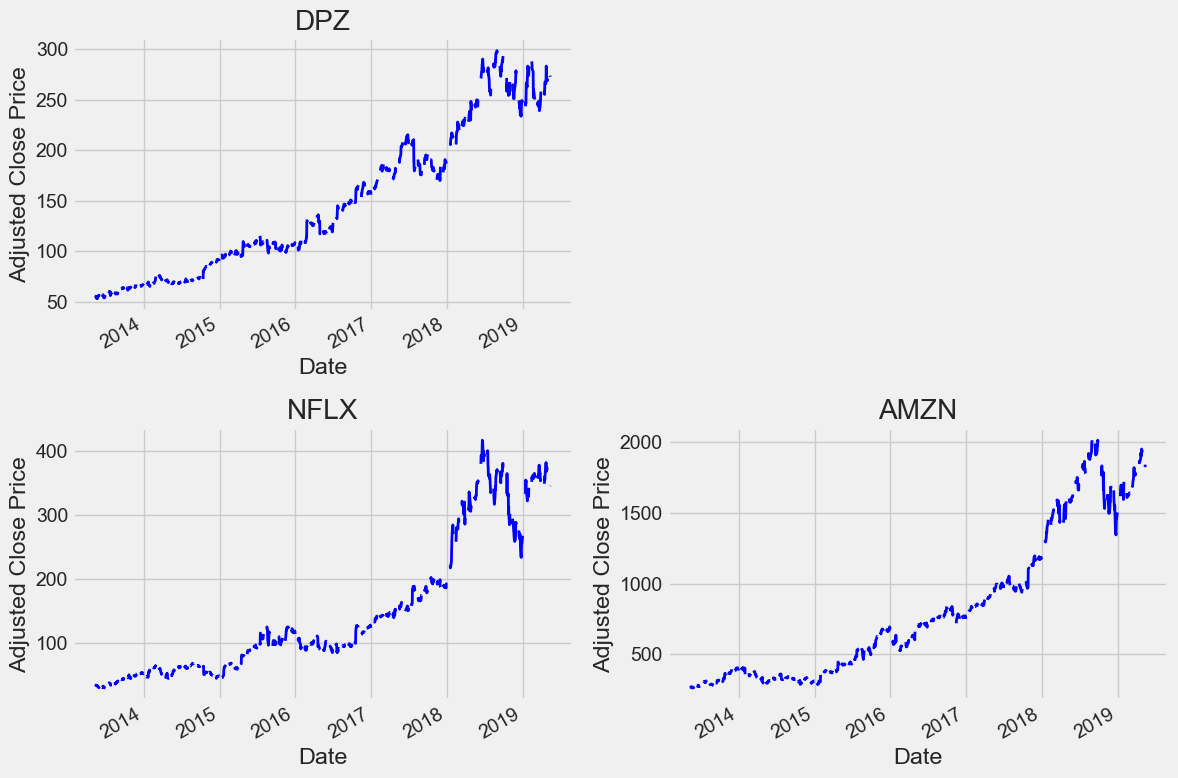

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming portfolio_data is your DataFrame and tech_list is defined
print("Columns in portfolio_data:", portfolio_data.columns)
print("Tech list:", tech_list)

# Strip whitespace from column names
portfolio_data.columns = portfolio_data.columns.str.strip()

# Create a subplot for each technology in tech_list
plt.figure(figsize=(12, 8))  # Optional: set a figure size
for i, tech in enumerate(tech_list, 1):
    if tech in portfolio_data.columns:
        plt.subplot(2, 2, i)  # Adjust subplot layout as needed
        portfolio_data.plot(x='Data', y=tech, ax=plt.gca(), color='blue', linewidth=2, legend=False)
        plt.ylabel('Adjusted Close Price')
        plt.xlabel('Date')
        plt.title(tech)  # Optional: add title for each subplot
    else:
        print(f"Warning: '{tech}' not found in portfolio_data columns.")

# Show the plots
plt.tight_layout()  # Optional: adjust layout to prevent overlap
plt.show()


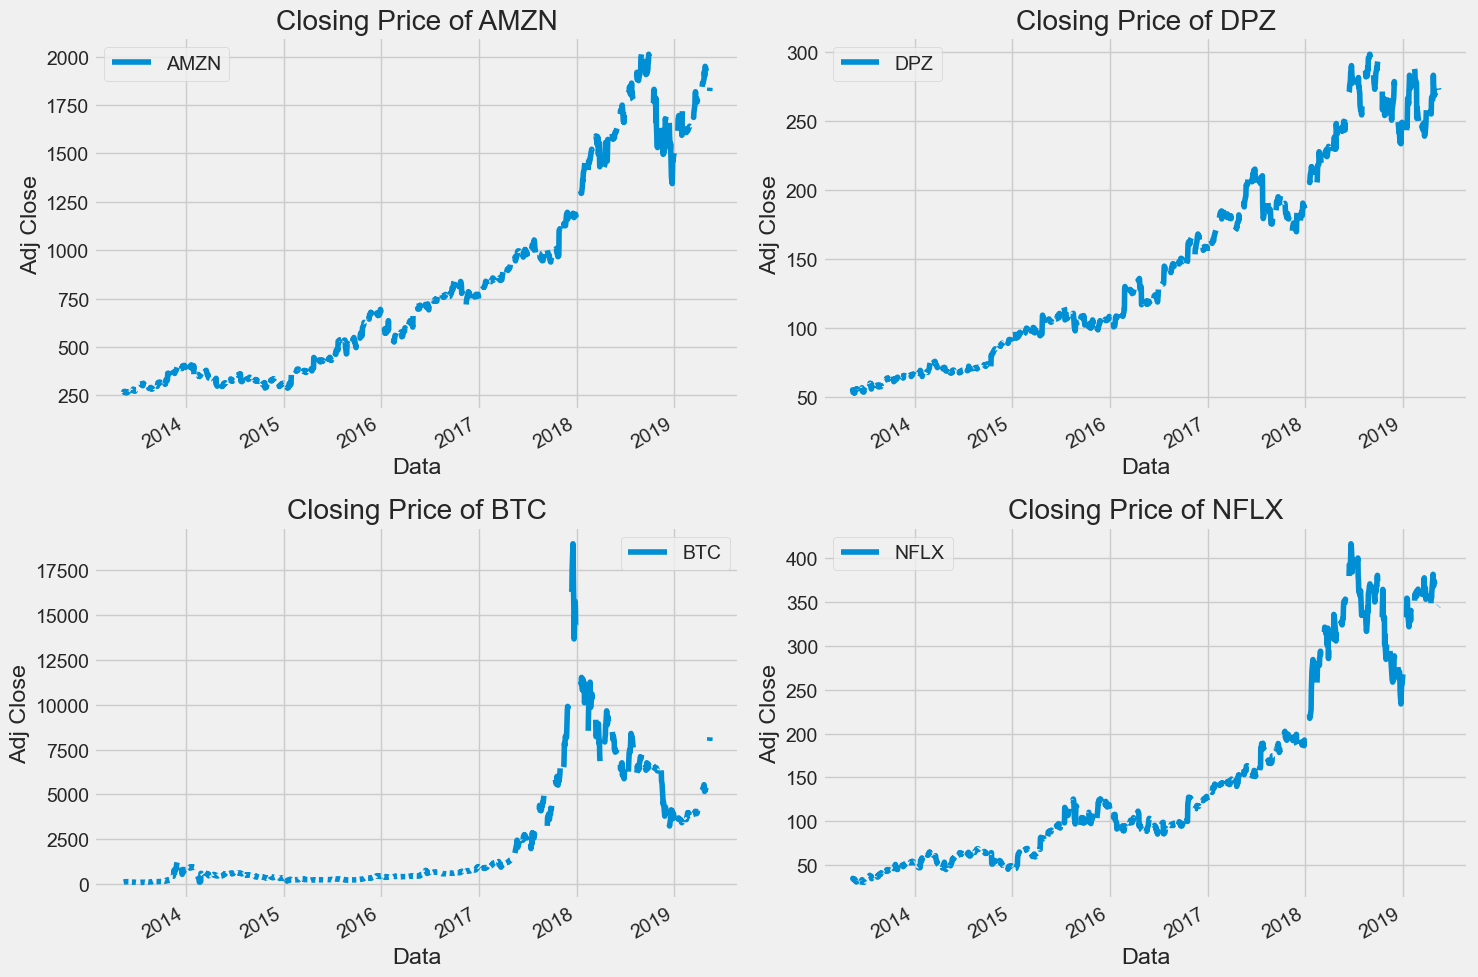

In [15]:
import matplotlib.pyplot as plt

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# List of columns you want to plot
tech_list = ['AMZN', 'DPZ', 'BTC', 'NFLX']

for i, tech in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    portfolio_data.plot(x='Data', y=tech, ax=plt.gca())  # Plot the selected tech stock against 'Date'
    plt.ylabel('Adj Close')
    plt.xlabel('Data')
    plt.title(f"Closing Price of {tech}")

plt.tight_layout()
plt.show()


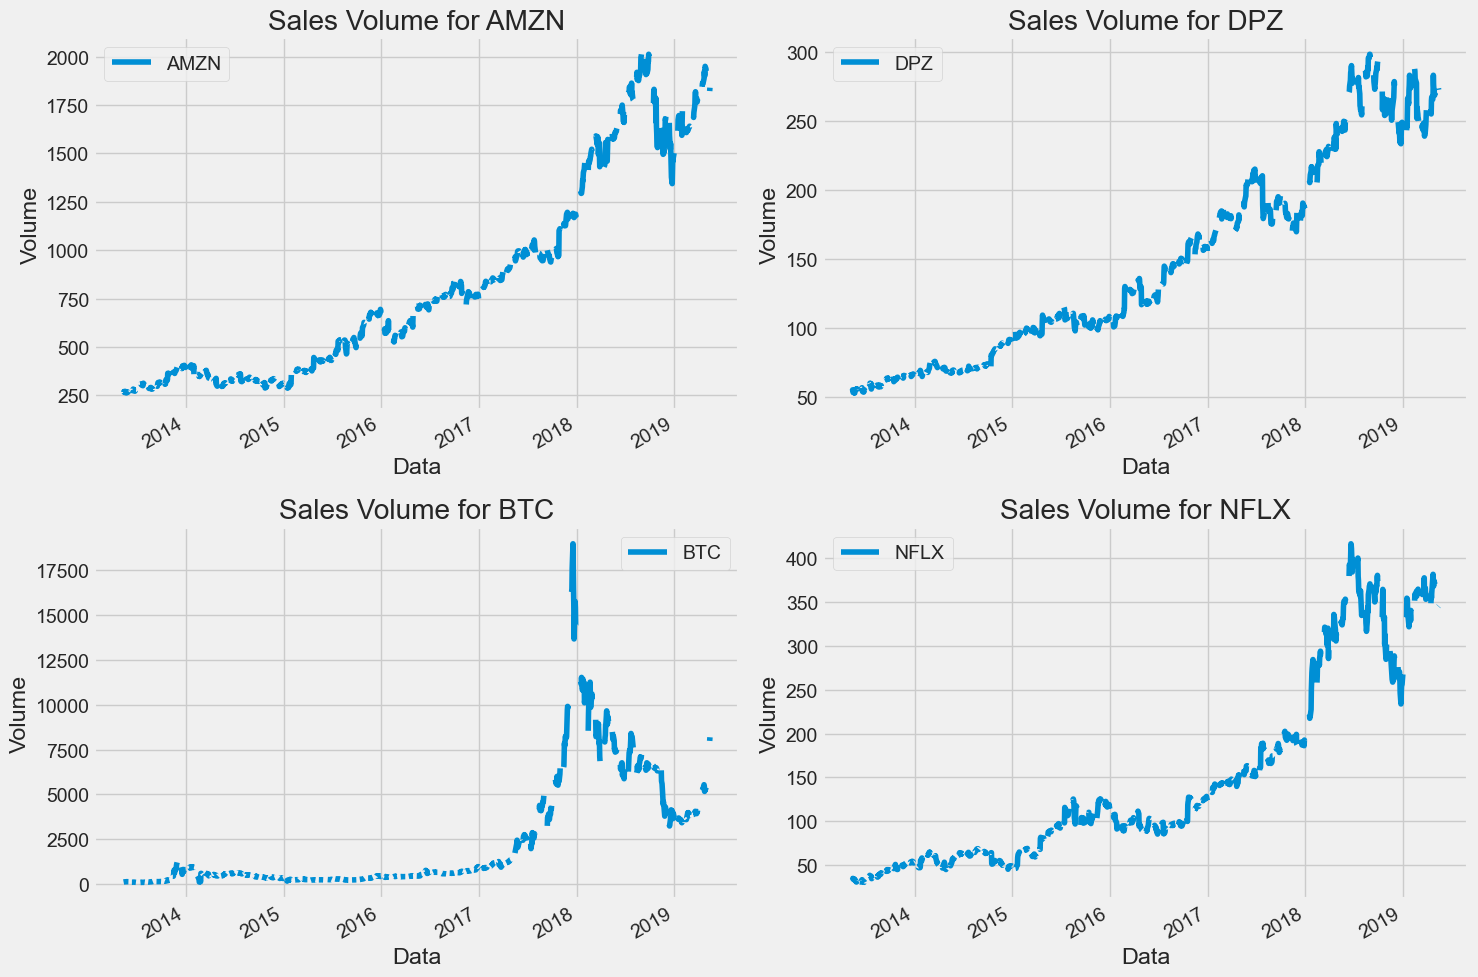

In [16]:
import matplotlib.pyplot as plt

# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# List of columns you want to plot
tech_list = ['AMZN', 'DPZ', 'BTC', 'NFLX']

for i, tech in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    portfolio_data.plot(x='Data', y=tech, ax=plt.gca())  # Use 'tech' to plot the volume
    plt.ylabel('Volume')
    plt.xlabel('Data')
    plt.title(f"Sales Volume for {tech}")

plt.tight_layout()
plt.show()


Columns in portfolio_data after adding MAs: Index(['Data', 'AMZN', 'DPZ', 'BTC', 'NFLX', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')


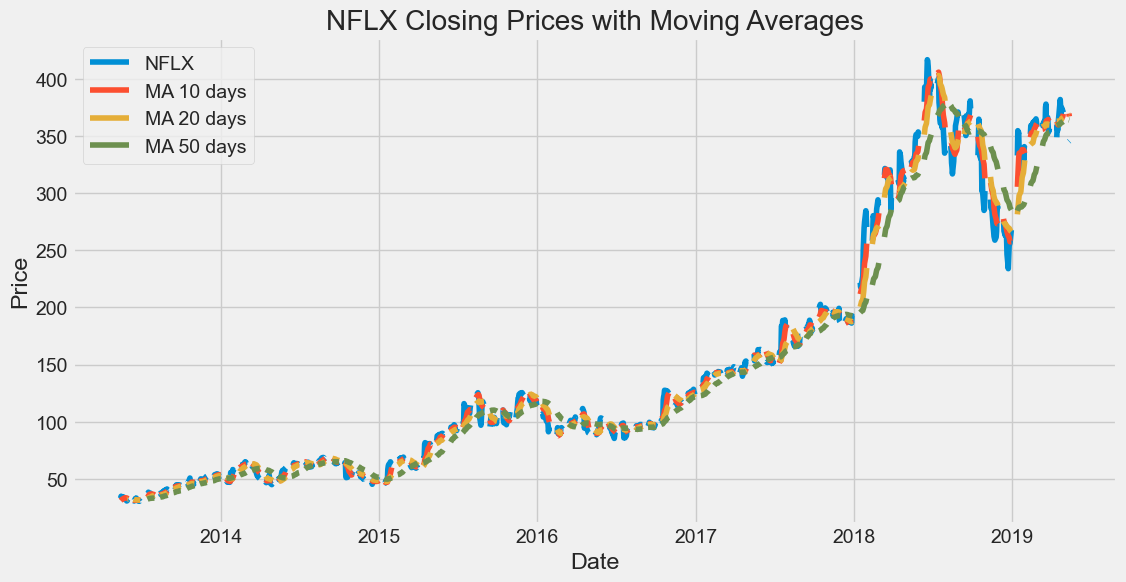

In [17]:
# Define the list of moving average days
ma_days = [10, 20, 50]  # Example moving averages

# Calculate moving averages and add to DataFrame
for ma in ma_days:
    column_name = f'MA for {ma} days'
    portfolio_data[column_name] = portfolio_data[tech].rolling(window=ma).mean()

# Check if moving average columns are created
print("Columns in portfolio_data after adding MAs:", portfolio_data.columns)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_data['Data'], portfolio_data[tech], label=tech)
for ma in ma_days:
    ma_column = f'MA for {ma} days'
    if ma_column in portfolio_data.columns:
        plt.plot(portfolio_data['Data'], portfolio_data[ma_column], label=f'MA {ma} days')
    else:
        print(f"Warning: '{ma_column}' not found in portfolio_data columns.")

plt.title(f"{tech} Closing Prices with Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


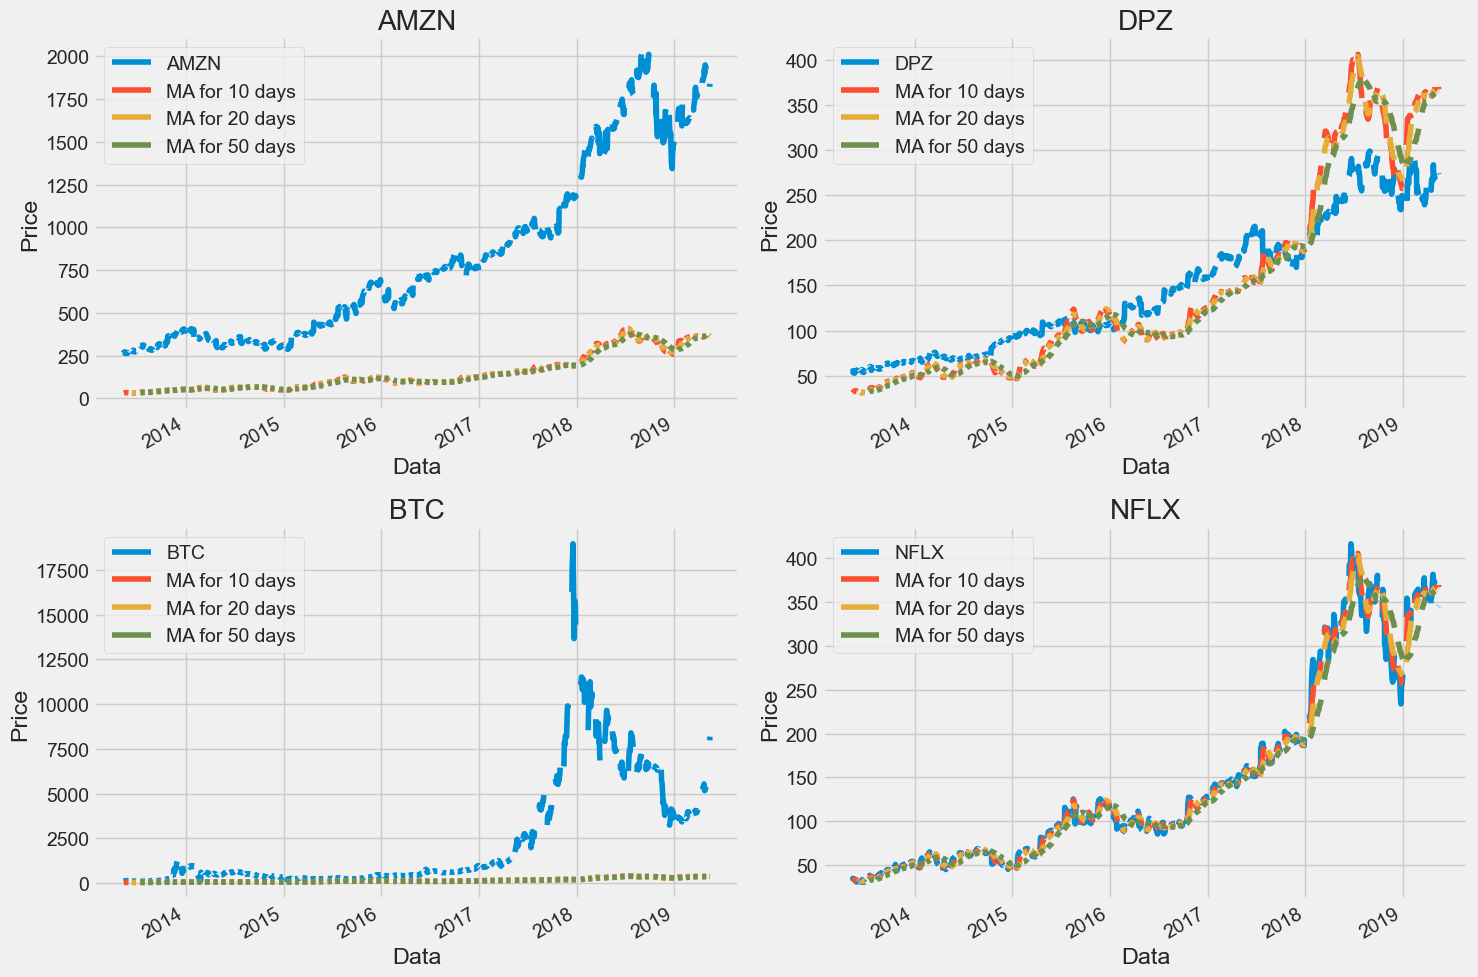

In [18]:
# Define the moving average days
ma_days = [10, 20, 50]

# Calculate moving averages for each tech stock
for ma in ma_days:
    for tech in tech_list:
        column_name = f"MA for {ma} days"
        portfolio_data[column_name] = portfolio_data[tech].rolling(ma).mean()

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot for each tech stock
for ax, tech in zip(axes.flatten(), tech_list):
    portfolio_data.plot(x='Data', y=[tech] + [f"MA for {ma} days" for ma in ma_days], ax=ax)
    ax.set_title(tech)
    ax.set_ylabel('Price')
    ax.set_xlabel('Data')

fig.tight_layout()
plt.show()

In [19]:
# Example of fetching data
import yfinance as yf

tech_list = ['AMZN', 'DPZ', 'NFLX']  # Example tech stocks
portfolio_data = pd.DataFrame()

for tech in tech_list:
    stock_data = yf.download(tech, start='2020-01-01', end='2023-01-01')
    stock_data['Ticker'] = tech  # Adding a column for the ticker
    portfolio_data = pd.concat([portfolio_data, stock_data], axis=0)

# Reset the index to have a clean DataFrame
portfolio_data.reset_index(inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
print("Available columns in portfolio_data:", portfolio_data.columns)


Available columns in portfolio_data: MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AMZN'),
            (    'Close', 'AMZN'),
            (     'High', 'AMZN'),
            (      'Low', 'AMZN'),
            (     'Open', 'AMZN'),
            (   'Volume', 'AMZN'),
            (   'Ticker',     ''),
            ('Adj Close',  'DPZ'),
            (    'Close',  'DPZ'),
            (     'High',  'DPZ'),
            (      'Low',  'DPZ'),
            (     'Open',  'DPZ'),
            (   'Volume',  'DPZ'),
            ('Adj Close', 'NFLX'),
            (    'Close', 'NFLX'),
            (     'High', 'NFLX'),
            (      'Low', 'NFLX'),
            (     'Open', 'NFLX'),
            (   'Volume', 'NFLX')],
           names=['Price', 'Ticker'])


In [27]:
print("Columns in portfolio_data:", portfolio_data.columns)



Columns in portfolio_data: Index(['Data', 'AAPL', 'GOOGL', 'MSFT'], dtype='object')


In [24]:
import plotly.graph_objects as go

# Assuming portfolio_data is already defined and contains the stock data
# Ensure tech_list contains the actual company codes that are in your DataFrame
tech_list = ['AAPL', 'GOOGL', 'MSFT']  # Replace with actual company codes in your portfolio_data

# Create a figure
fig = go.Figure()

# Loop through each company code in tech_list
for tech in tech_list:
    if tech in portfolio_data.columns:
        # Add a trace for the company stock
        fig.add_trace(go.Scatter(
            x=portfolio_data['Data'],  # Assuming 'Data' column contains dates
            y=portfolio_data[tech],     # y-values for the current company
            mode='lines', 
            name=tech
        ))
    else:
        print(f"Warning: '{tech}' not found in portfolio_data columns.")

# Update layout with titles and labels
fig.update_layout(
    title='Stock Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white'  # Optional: gives a clean look
)

# Show the figure
fig.show()


In [23]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame structure (replace this with your actual data)
data = {
    'Data': pd.date_range(start='2023-01-01', periods=5, freq='D'),
    'AAPL': [150, 152, 151, 153, 155],  # Example for Apple Inc.
    'GOOGL': [2800, 2780, 2820, 2840, 2860],  # Example for Alphabet Inc.
    'MSFT': [300, 305, 310, 312, 315]  # Example for Microsoft Corp.
}

portfolio_data = pd.DataFrame(data)

# List of company codes to plot
tech_list = ['AAPL', 'GOOGL', 'MSFT']  # Replace with your actual company codes

# Create a figure
fig = go.Figure()

# Loop through each company code in tech_list
for tech in tech_list:
    if tech in portfolio_data.columns:
        # Add a trace for the company stock
        fig.add_trace(go.Scatter(
            x=portfolio_data['Data'], 
            y=portfolio_data[tech], 
            mode='lines', 
            name=tech
        ))
    else:
        print(f"Warning: '{tech}' not found in portfolio_data columns.")

# Update layout with titles and labels
fig.update_layout(
    title='Stock Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white'  # Optional: gives a clean look
)

# Show the figure
fig.show()


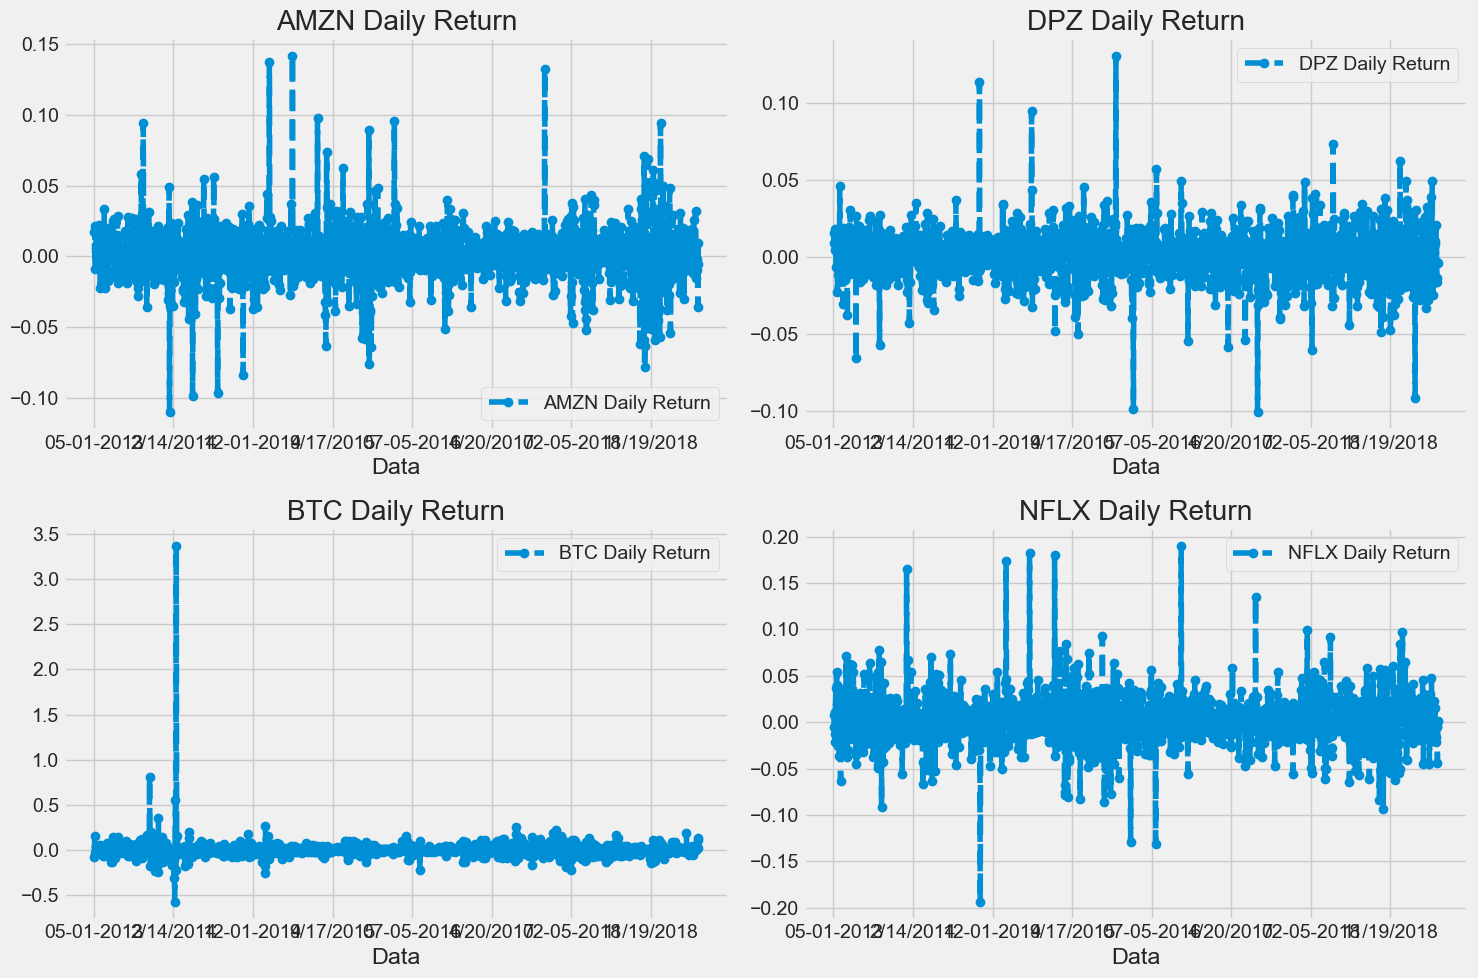

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
portfolio_data = pd.read_csv('portfolio_data.csv')

# Specify the list of tech stocks to analyze
tech_list = ['AMZN', 'DPZ', 'BTC', 'NFLX']  # Adjust this list based on your actual data

# We'll use pct_change to find the percent change for each day
for tech in tech_list:
    portfolio_data[f'{tech} Daily Return'] = portfolio_data[tech].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for ax, tech in zip(axes.flatten(), tech_list):
    portfolio_data.plot(x='Data', y=f'{tech} Daily Return', ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(f'{tech} Daily Return')

fig.tight_layout()
plt.show()


In [44]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

# Define your portfolio
tech_list = ['AMZN', 'BTC-USD', 'NFLX', 'DPZ']
data_frames = []  # List to hold individual DataFrames

# Fetch data for each ticker
for tech in tech_list:
    data = yf.download(tech, period='1y')
    data['Ticker'] = tech  # Add a Ticker column
    data_frames.append(data)  # Collect DataFrame

# Concatenate all DataFrames at once
portfolio_data = pd.concat(data_frames, axis=1)

# Flatten MultiIndex columns for easier access
portfolio_data.columns = [f"{price} {ticker}" for price, ticker in portfolio_data.columns]

# Print the columns for debugging
print("Columns in portfolio_data:", portfolio_data.columns)

# Calculate daily returns for each stock in tech_list
for tech in tech_list:
    close_col_name = f'Adj Close {tech}' if tech != 'BTC-USD' else f'Close {tech}'
    if close_col_name in portfolio_data.columns:
        # Calculate daily returns
        portfolio_data[f'{tech} Daily Return'] = portfolio_data[close_col_name].pct_change()
    else:
        print(f"Warning: '{close_col_name}' not found in portfolio_data columns.")

# Check if the daily return columns were created
for tech in tech_list:
    daily_return_col = f'{tech} Daily Return'
    if daily_return_col in portfolio_data.columns:
        print(f"Daily return column '{daily_return_col}' created successfully.")
    else:
        print(f"Warning: Daily return column '{daily_return_col}' not found for {tech}.")

# Plotting the daily returns
fig = go.Figure()

for tech in tech_list:
    daily_return_col = f'{tech} Daily Return'
    if daily_return_col in portfolio_data.columns:
        # Ensure we're using a Series to avoid performance warnings
        daily_returns = portfolio_data[daily_return_col].copy()
        fig.add_trace(go.Scatter(x=portfolio_data.index, 
                                 y=daily_returns, 
                                 mode='lines', 
                                 name=tech))
    else:
        print(f"Warning: Daily return column '{daily_return_col}' not found for {tech}.")

fig.update_layout(title='Daily Returns Over Time', xaxis_title='Date', yaxis_title='Daily Return')
fig.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\Vadde Vaishnavi\AppData\Local\Temp\ipykernel_29560\2477763255.py:29: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

C:\Users\Vadde Vaishnavi\AppData\Local\Temp\ipykernel_29560\2477763255.py:29: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

C:\Users\Vadde Vaishnavi\AppData\Local\Temp\ipykernel_29560\2477763255.py:29: 

Columns in portfolio_data: Index(['Adj Close AMZN', 'Close AMZN', 'High AMZN', 'Low AMZN', 'Open AMZN',
       'Volume AMZN', 'Ticker ', 'Adj Close BTC-USD', 'Close BTC-USD',
       'High BTC-USD', 'Low BTC-USD', 'Open BTC-USD', 'Volume BTC-USD',
       'Ticker ', 'Adj Close NFLX', 'Close NFLX', 'High NFLX', 'Low NFLX',
       'Open NFLX', 'Volume NFLX', 'Ticker ', 'Adj Close DPZ', 'Close DPZ',
       'High DPZ', 'Low DPZ', 'Open DPZ', 'Volume DPZ', 'Ticker '],
      dtype='object')
Daily return column 'AMZN Daily Return' created successfully.
Daily return column 'BTC-USD Daily Return' created successfully.
Daily return column 'NFLX Daily Return' created successfully.
Daily return column 'DPZ Daily Return' created successfully.


In [45]:
import yfinance as yf  # Make sure yfinance is installed

# Define the list of tech stocks
tech_list = ['AMZN', 'DPZ', 'BTC', 'NFLX']  # Adjust this list based on your actual data

# Set up start and end dates for data retrieval
end = datetime.now()  # Current date
start = datetime(end.year - 1, end.month, end.day)  # One year back from today

# Fetch the closing prices for the tech stocks using yfinance
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()  # Calculate daily returns

# Display the first few rows of the returns DataFrame
print(tech_rets.head())


[*********************100%***********************]  4 of 4 completed

Ticker                         AMZN  BTC       DPZ      NFLX
Date                                                        
2023-10-30 00:00:00+00:00       NaN  NaN       NaN       NaN
2023-10-31 00:00:00+00:00  0.002863  NaN  0.000827  0.003926
2023-11-01 00:00:00+00:00  0.029379  NaN  0.015163  0.020647
2023-11-02 00:00:00+00:00  0.007810  NaN  0.012350  0.010757
2023-11-03 00:00:00+00:00  0.003839  NaN  0.038923  0.018012


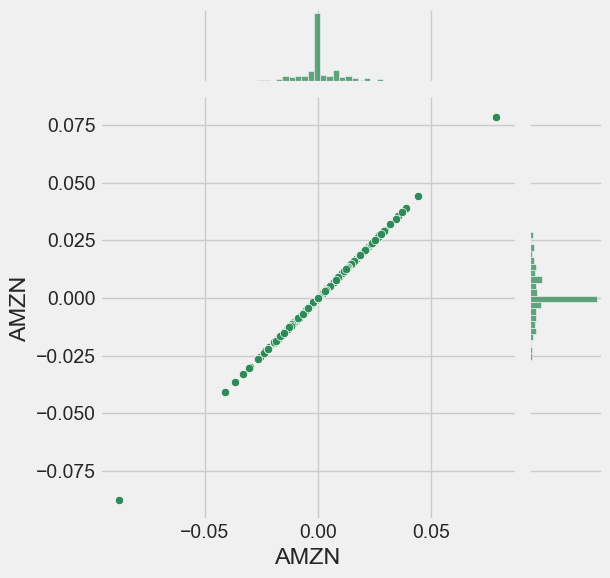

In [47]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='AMZN', y='AMZN', data=tech_rets, kind='scatter', color='seagreen')


In [49]:
print(tech_rets.columns)


Index(['AMZN', 'BTC-USD', 'DPZ', 'NFLX'], dtype='object', name='Ticker')


In [50]:
import requests

# Test the Yahoo Finance URL
url = 'https://finance.yahoo.com'
response = requests.get(url)

if response.status_code == 200:
    print("Yahoo Finance is accessible.")
else:
    print(f"Failed to access Yahoo Finance. Status code: {response.status_code}")


Yahoo Finance is accessible.


In [51]:
import yfinance as yf
from datetime import datetime

# Define your tech list
tech_list = ['AMZN', 'NFLX', 'AAPL', 'GOOGL']  # Use valid stock symbols

# Set up start and end dates for data retrieval
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)  # One year back from today

# Fetch the data using yfinance
try:
    closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']
    print(closing_df)

    # Calculate daily returns
    tech_rets = closing_df.pct_change()
    print(tech_rets.head())
except Exception as e:
    print(f"An error occurred: {e}")


[*********************100%***********************]  4 of 4 completed

Ticker                           AAPL        AMZN       GOOGL        NFLX
Date                                                                     
2023-10-30 00:00:00+00:00  169.423035  132.710007  124.152580  410.079987
2023-10-31 00:00:00+00:00  169.900604  133.089996  123.773521  411.690002
2023-11-01 00:00:00+00:00  173.084320  137.000000  126.137657  420.190002
2023-11-02 00:00:00+00:00  176.666000  138.070007  127.175095  424.709991
2023-11-03 00:00:00+00:00  175.750656  138.600006  128.781128  432.359985
...                               ...         ...         ...         ...
2024-10-24 00:00:00+00:00  230.570007  186.380005  162.720001  754.549988
2024-10-25 00:00:00+00:00  231.410004  187.830002  165.270004  754.679993
2024-10-28 00:00:00+00:00  233.399994  188.389999  166.720001  749.119995
2024-10-29 00:00:00+00:00  233.669998  190.830002  169.679993  759.440002
2024-10-30 00:00:00+00:00  232.192001  193.300003  179.860001  757.000000

[253 rows x 4 columns]
Ticker        

In [53]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the stock symbols
tech_list = ['AMZN', 'MSFT']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty DataFrame to store adjusted closing prices
closing_df = pd.DataFrame()

# Fetch data for each stock
for symbol in tech_list:
    try:
        data = yf.download(symbol, start=start, end=end)
        closing_df[symbol] = data['Adj Close']  # Store adjusted closing prices
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")

# Calculate daily returns
tech_rets = closing_df.pct_change()
print(tech_rets.head())  # Display the returns DataFrame
tech_rets.dropna(inplace=True)
print(closing_df.shape)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                               AMZN      MSFT
Date                                         
2023-10-30 00:00:00+00:00       NaN       NaN
2023-10-31 00:00:00+00:00  0.002863  0.002372
2023-11-01 00:00:00+00:00  0.029379  0.023543
2023-11-02 00:00:00+00:00  0.007810  0.006502
2023-11-03 00:00:00+00:00  0.003839  0.012862
(253, 2)


In [55]:
import yfinance as yf
import pandas as pd
from datetime import datetime

tech_list = ['AMZN', 'MSFT']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty DataFrame to store adjusted closing prices
closing_df = pd.DataFrame()

for symbol in tech_list:
    try:
        data = yf.download(symbol, start=start, end=end)
        if not data.empty:
            closing_df[symbol] = data['Adj Close']
        else:
            print(f"No data found for {symbol}.")
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")

# Calculate daily returns if there is data
if not closing_df.empty:
    tech_rets = closing_df.pct_change()
    print(tech_rets.head())  # Display the returns DataFrame
else:
    print("No data available for any of the symbols.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                               AMZN      MSFT
Date                                         
2023-10-30 00:00:00+00:00       NaN       NaN
2023-10-31 00:00:00+00:00  0.002863  0.002372
2023-11-01 00:00:00+00:00  0.029379  0.023543
2023-11-02 00:00:00+00:00  0.007810  0.006502
2023-11-03 00:00:00+00:00  0.003839  0.012862


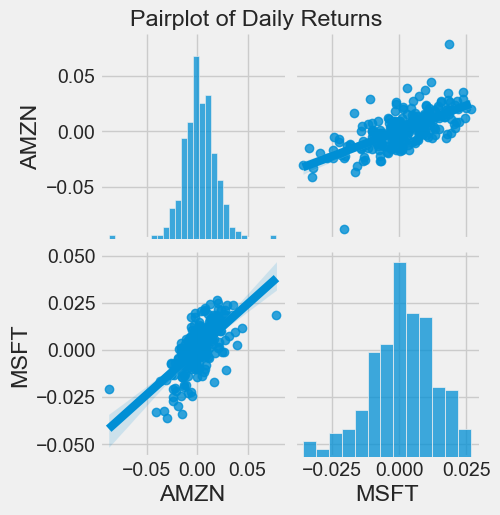

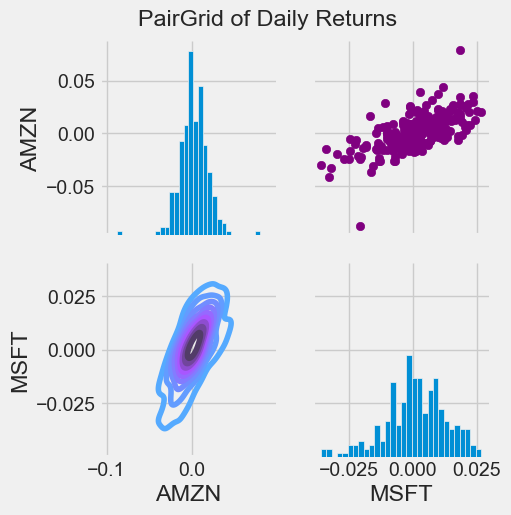

In [56]:
# Calculate daily returns
tech_rets = closing_df.pct_change().dropna()

# Check if tech_rets is not empty before plotting
if not tech_rets.empty:
    # Automatic visual analysis using pairplot
    sns.pairplot(tech_rets, kind='reg')
    plt.suptitle("Pairplot of Daily Returns", y=1.02)
    plt.show()

    # Set up our figure using PairGrid
    return_fig = sns.PairGrid(tech_rets)
    
    # Upper triangle scatter plots
    return_fig.map_upper(plt.scatter, color='purple')

    # Lower triangle KDE plots
    return_fig.map_lower(sns.kdeplot, cmap='cool_d')

    # Diagonal histograms of daily returns
    return_fig.map_diag(plt.hist, bins=30)
    
    plt.suptitle("PairGrid of Daily Returns", y=1.02)
    plt.show()
else:
    print("No data available for the daily returns.")

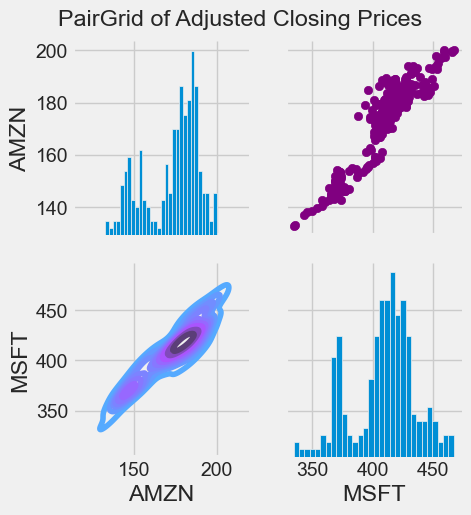

In [57]:
# Check if closing_df is not empty before plotting
if not closing_df.empty:
    # Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
    returns_fig = sns.PairGrid(closing_df)

    # Using map_upper we can specify what the upper triangle will look like
    returns_fig.map_upper(plt.scatter, color='purple')

    # Define the lower triangle in the figure, including the plot type (KDE) and the color map
    returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

    # Define the diagonal as a series of histogram plots of the daily returns
    returns_fig.map_diag(plt.hist, bins=30)

    # Set the title for the figure
    plt.suptitle("PairGrid of Adjusted Closing Prices", y=1.02)
    plt.show()
else:
    print("No data available for closing prices.")

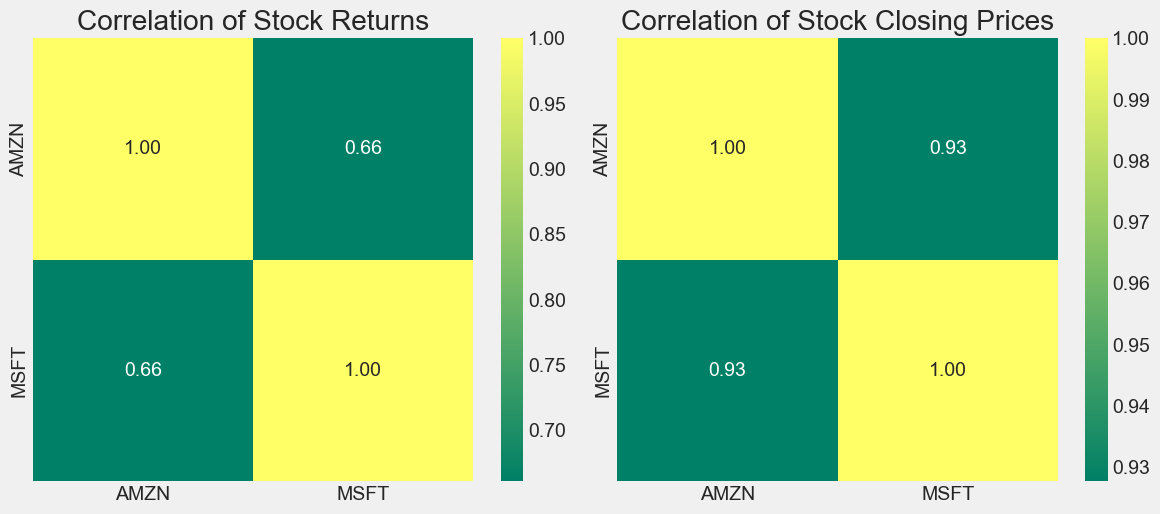

In [58]:
# Calculate daily returns
tech_rets = closing_df.pct_change().dropna()

# Set up the figure for heatmaps
plt.figure(figsize=(12, 10))

# Heatmap for correlation of stock returns
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation of Stock Returns')

# Heatmap for correlation of stock closing prices
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation of Stock Closing Prices')

# Adjust layout
plt.tight_layout()
plt.show()

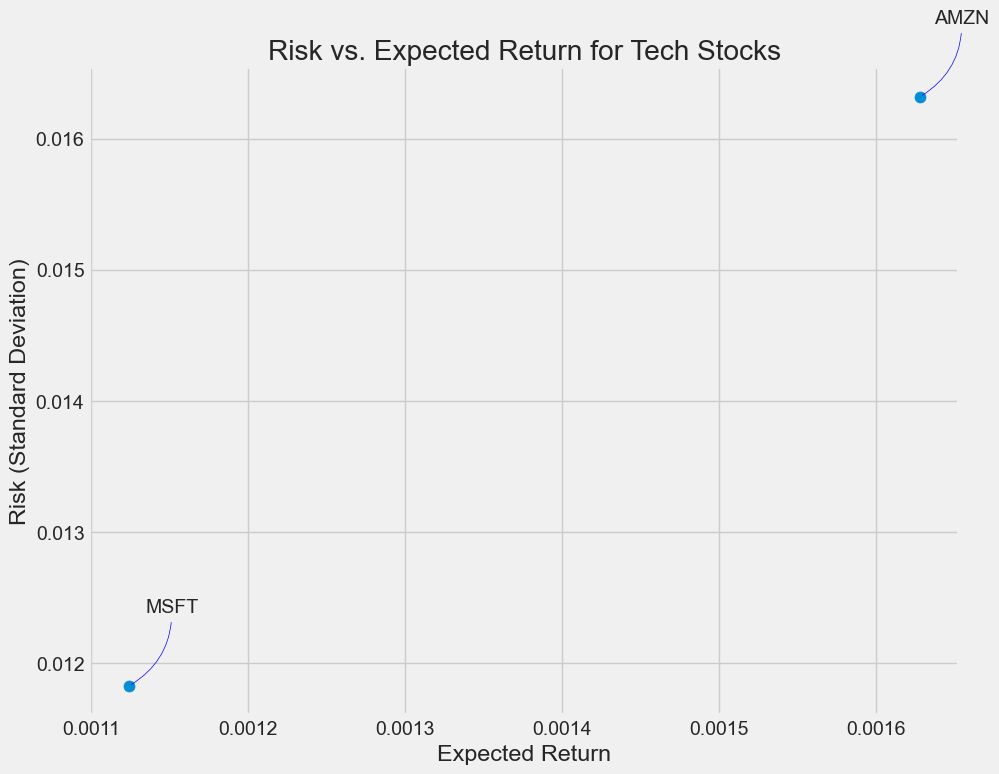

In [60]:
import numpy as np
import matplotlib.pyplot as plt  # Make sure to import matplotlib for plotting

# Calculate expected return and risk
rets = tech_rets.dropna()
area = np.pi * 20  # Adjust the area for the size of the scatter plot points

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)

# Label the axes
plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')

# Annotate each point with the stock symbol
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', 
                 ha='right', va='bottom', arrowprops=dict(arrowstyle='-', 
                 color='blue', connectionstyle='arc3,rad=-0.3'))

# Show the plot
plt.title('Risk vs. Expected Return for Tech Stocks')
plt.grid(True)
plt.show()


In [61]:
import yfinance as yf
from datetime import datetime

# Define the date range
start_date = '2012-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

# Get the stock quote
df = yf.download('AAPL', start=start_date, end=end_date)

# Show the data
print(df)


[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2012-01-03 00:00:00+00:00   12.402628   14.686786   14.732143   14.607143   
2012-01-04 00:00:00+00:00   12.469282   14.765714   14.810000   14.617143   
2012-01-05 00:00:00+00:00   12.607713   14.929643   14.948214   14.738214   
2012-01-06 00:00:00+00:00   12.739513   15.085714   15.098214   14.972143   
2012-01-09 00:00:00+00:00   12.719308   15.061786   15.276786   15.048214   
...                               ...         ...         ...         ...   
2024-10-23 00:00:00+00:00  230.759995  230.759995  235.139999  227.759995   
2024-10-24 00:00:00+00:00  230.570007  230.570007  230.820007  228.410004   
2024-10-25 00:00:00+00:00  231.410004  231.410004  233.220001  229.570007   
2024-10-28 00:00:00+00:00  233.399994  233.399994  234.729996  232.550003   

In [62]:
import requests
import pandas as pd

api_key = 'YOUR_ALPHA_VANTAGE_API_KEY'
symbol = 'AAPL'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Convert the daily time series to a DataFrame
df = pd.DataFrame(data['Time Series (Daily)']).T
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df = df.astype(float)  # Convert columns to float

print(df)


              Open     High     Low   Close       Volume
2024-10-29  233.10  234.325  232.32  233.67   35417247.0
2024-10-28  233.32  234.730  232.55  233.40   36087134.0
2024-10-25  229.74  233.220  229.57  231.41   38802304.0
2024-10-24  229.98  230.820  228.41  230.57   31109503.0
2024-10-23  234.08  235.144  227.76  230.76   52286979.0
...            ...      ...     ...     ...          ...
2024-06-13  214.74  216.750  211.60  214.24   97862729.0
2024-06-12  207.37  220.200  206.90  213.07  198134293.0
2024-06-11  193.65  207.160  193.63  207.15  172373296.0
2024-06-10  196.90  197.300  192.15  193.12   97262077.0
2024-06-07  194.65  196.940  194.14  196.89   53103912.0

[100 rows x 5 columns]


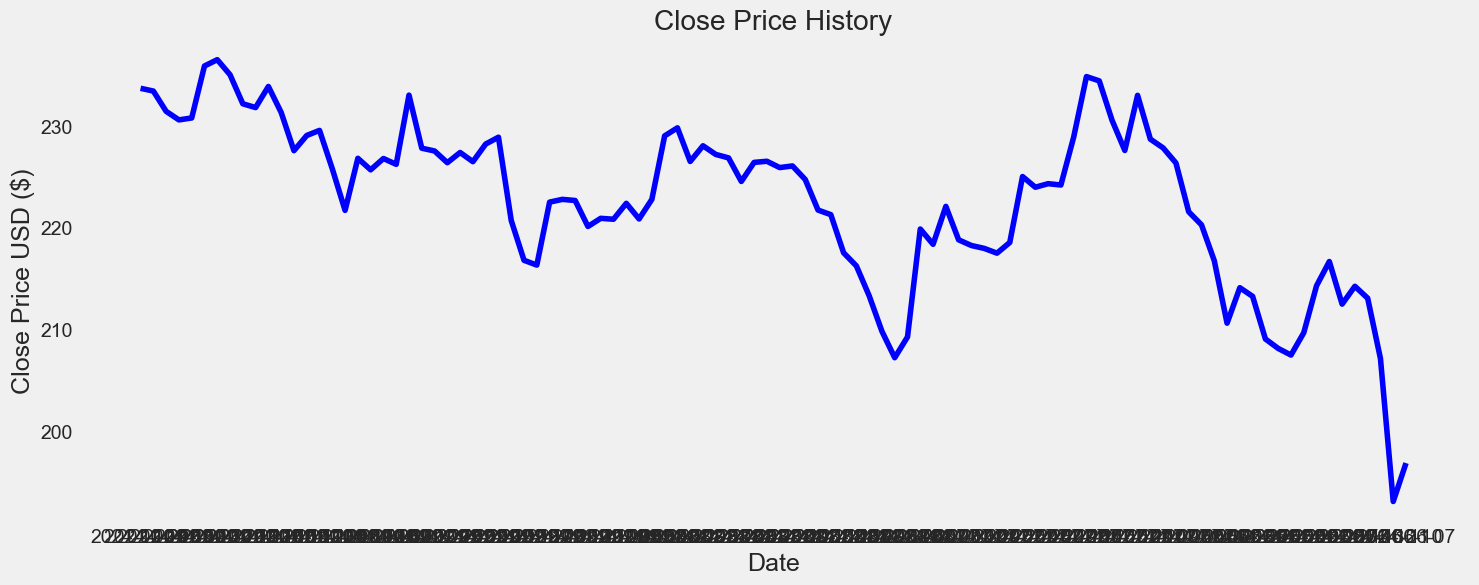

In [63]:
# Plotting
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'], color='blue')  # You can specify the color if desired
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.grid()  # Optional: Add a grid for better visibility
plt.show()

In [65]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (95% of the dataset)
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Print the training data length
print(training_data_len)


95


In [66]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Print the shape and the first few rows of the dataframe
print("Data shape:", data.shape)
print(data.head())

# Convert the dataframe to a numpy array
dataset = data.values


Data shape: (100, 1)
             Close
2024-10-29  233.67
2024-10-28  233.40
2024-10-25  231.41
2024-10-24  230.57
2024-10-23  230.76


In [67]:
import yfinance as yf
from datetime import datetime

# Define the date range
start_date = '2012-01-01'
end_date = datetime.now()

# Get the stock quote
df = yf.download('AAPL', start=start_date, end=end_date)

# Check if the DataFrame is empty
print("DataFrame after download:")
print(df)
print("Is DataFrame empty?", df.empty)



[*********************100%***********************]  1 of 1 completed

DataFrame after download:
Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2012-01-03 00:00:00+00:00   12.402627   14.686786   14.732143   14.607143   
2012-01-04 00:00:00+00:00   12.469280   14.765714   14.810000   14.617143   
2012-01-05 00:00:00+00:00   12.607717   14.929643   14.948214   14.738214   
2012-01-06 00:00:00+00:00   12.739509   15.085714   15.098214   14.972143   
2012-01-09 00:00:00+00:00   12.719305   15.061786   15.276786   15.048214   
...                               ...         ...         ...         ...   
2024-10-24 00:00:00+00:00  230.570007  230.570007  230.820007  228.410004   
2024-10-25 00:00:00+00:00  231.410004  231.410004  233.220001  229.570007   
2024-10-28 00:00:00+00:00  233.399994  233.399994  234.729996  232.550003   
2024-10-29 00:00:00+00:00  233.669998  233.669998 

In [68]:
df = yf.download('GOOGL', start=start_date, end=end_date)
print("DataFrame for GOOGL:")
print(df)
print("Is DataFrame empty?", df.empty)




[*********************100%***********************]  1 of 1 completed

DataFrame for GOOGL:
Price                       Adj Close       Close        High         Low  \
Ticker                          GOOGL       GOOGL       GOOGL       GOOGL   
Date                                                                        
2012-01-03 00:00:00+00:00   16.610771   16.651901   16.720470   16.325577   
2012-01-04 00:00:00+00:00   16.682417   16.723724   16.773024   16.532032   
2012-01-05 00:00:00+00:00   16.451006   16.491741   16.615866   16.422173   
2012-01-06 00:00:00+00:00   16.226587   16.266768   16.516518   16.261011   
2012-01-09 00:00:00+00:00   15.538600   15.577077   16.191191   15.546296   
...                               ...         ...         ...         ...   
2024-10-24 00:00:00+00:00  162.720001  162.720001  163.330002  161.009995   
2024-10-25 00:00:00+00:00  165.270004  165.270004  165.589996  163.419998   
2024-10-28 00:00:00+00:00  166.720001  166.720001  168.750000  163.949997   
2024-10-29 00:00:00+00:00  169.679993  169.679993  170.

In [69]:
import pandas as pd
import yfinance as yf

# Example of fetching data
df = yf.download('AAPL', start='2012-01-01', end='2024-01-01')
print(df.head())  # Check if data is fetched correctly


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2012-01-03 00:00:00+00:00  12.402625  14.686786  14.732143  14.607143   
2012-01-04 00:00:00+00:00  12.469280  14.765714  14.810000  14.617143   
2012-01-05 00:00:00+00:00  12.607713  14.929643  14.948214  14.738214   
2012-01-06 00:00:00+00:00  12.739511  15.085714  15.098214  14.972143   
2012-01-09 00:00:00+00:00  12.719303  15.061786  15.276786  15.048214   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2012-01-03 00:00:00+00:00  14.621429  302220800  
2012-01-04 00:00:00+00:00  14.642857  260022000  
2012-01-05 00:00:00+00:00  14.819643  271269600  
2012-01-06 00:00:00+00:00  14.991786  318292800  
2012-01-09 00:00:00+00:00  15.196429  394024400  


In [70]:
if 'Close' not in df.columns:
    raise ValueError("Close column not found in data")


In [71]:
data = df.filter(['Close'])
print(data.head())  # Ensure 'data' has values
dataset = data.values
print(dataset.shape)  # Check the shape of dataset


Empty DataFrame
Columns: []
Index: [2012-01-03 00:00:00+00:00, 2012-01-04 00:00:00+00:00, 2012-01-05 00:00:00+00:00, 2012-01-06 00:00:00+00:00, 2012-01-09 00:00:00+00:00]
(3018, 0)


In [72]:
print("DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", data.shape)
print("Dataset shape:", dataset.shape)


DataFrame shape: (3018, 6)
Filtered DataFrame shape: (3018, 0)
Dataset shape: (3018, 0)


In [73]:
import yfinance as yf

# Fetch data for Apple Inc. (AAPL)
df = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Print the DataFrame and its shape
print(df.head())
print("DataFrame shape:", df.shape)

# Check if the DataFrame is empty
if df.empty:
    print("The DataFrame is empty. No data was fetched for the specified date range.")
else:
    print("Data fetched successfully.")


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.876122  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.167595  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.742668  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.400543  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.565201  75.797501  76.110001  74.290001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2020-01-02 00:00:00+00:00  74.059998  135480400  
2020-01-03 00:00:00+00:00  74.287498  146322800  
2020-01-06 00:00:00+00:00  73.447502  118387200  
2020-01-07 00:00:00+00:00  74.959999  108872000  
2020-01-08 00:00:00+00:00  74.290001  132079200  
DataFrame shape

In [74]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' contains your fetched data and you're interested in the 'Close' prices
dataset = df['Close'].values.reshape(-1, 1)  # Reshape to 2D array

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Check the scaled data
print("Scaled Data Shape:", scaled_data.shape)


Scaled Data Shape: (1006, 1)


In [75]:
# Create the training data set 
training_data_len = int(np.ceil(len(scaled_data) * .95))

# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [76]:
import keras
print(keras.__version__)



3.6.0


In [77]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [79]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

# Example input shape
timesteps = 10  # Number of time steps
features = 1    # Number of features (e.g., one price value)

# Create a Sequential model
model = Sequential()

# Add an Input layer
model.add(Input(shape=(timesteps, features)))

# Now add your RNN layer (e.g., LSTM)
model.add(LSTM(units=50, return_sequences=True))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = data['AMZN'][training_data_len:].values  # Extracting actual closing prices for y_test

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])  # Append the last 60 days of data

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # 3D shape for LSTM

# Get the model's predicted price values
predictions = model.predict(x_test)

# Reshape predictions to 2D for inverse transformation
predictions = predictions.reshape(predictions.shape[0], -1)  # Reshape to (samples, features)

# Inverse scaling of predictions
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test.reshape(-1, 1)) ** 2))  # Ensure y_test shape matches predictions
print(f"Root Mean Squared Error: {rmse}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Root Mean Squared Error: 1412.7280356074868


In [15]:
# Create the testing data set
# Create a new array containing scaled values from index `training_data_len - 60` to the end
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = data['AMZN'][training_data_len:].values  # Extracting actual closing prices for y_test

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling of predictions

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test.reshape(-1, 1)) ** 2))  # Ensure y_test shape matches predictions
rmse


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


np.float64(72.89498663934326)

C:\Users\Vadde Vaishnavi\AppData\Local\Temp\ipykernel_29560\3889714639.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



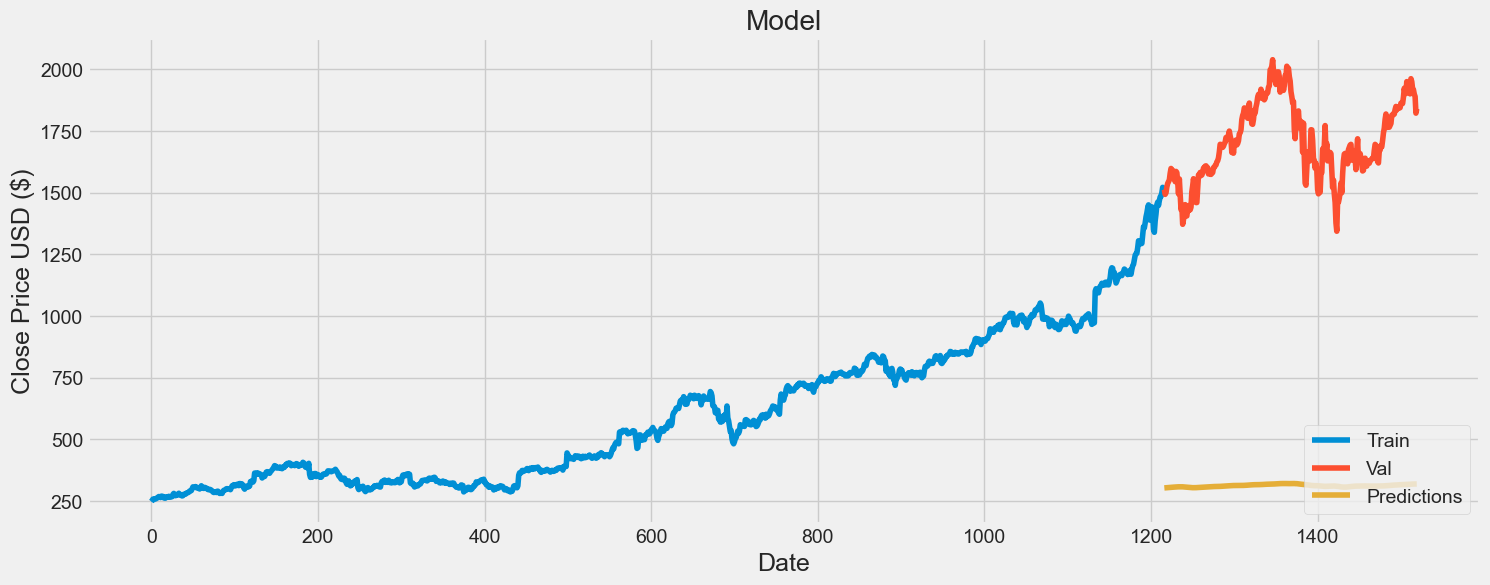

In [84]:
# Ensure predictions are 1D by taking the last value in the sequence
predictions = predictions[:, -1]  # Adjust this based on your prediction shape

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

# Assign predictions to the valid DataFrame
valid['Predictions'] = predictions  # Ensure shapes match

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['AMZN'], label='Train')
plt.plot(valid['AMZN'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend(loc='lower right')
plt.show()


C:\Users\Vadde Vaishnavi\AppData\Local\Temp\ipykernel_29560\2124941584.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



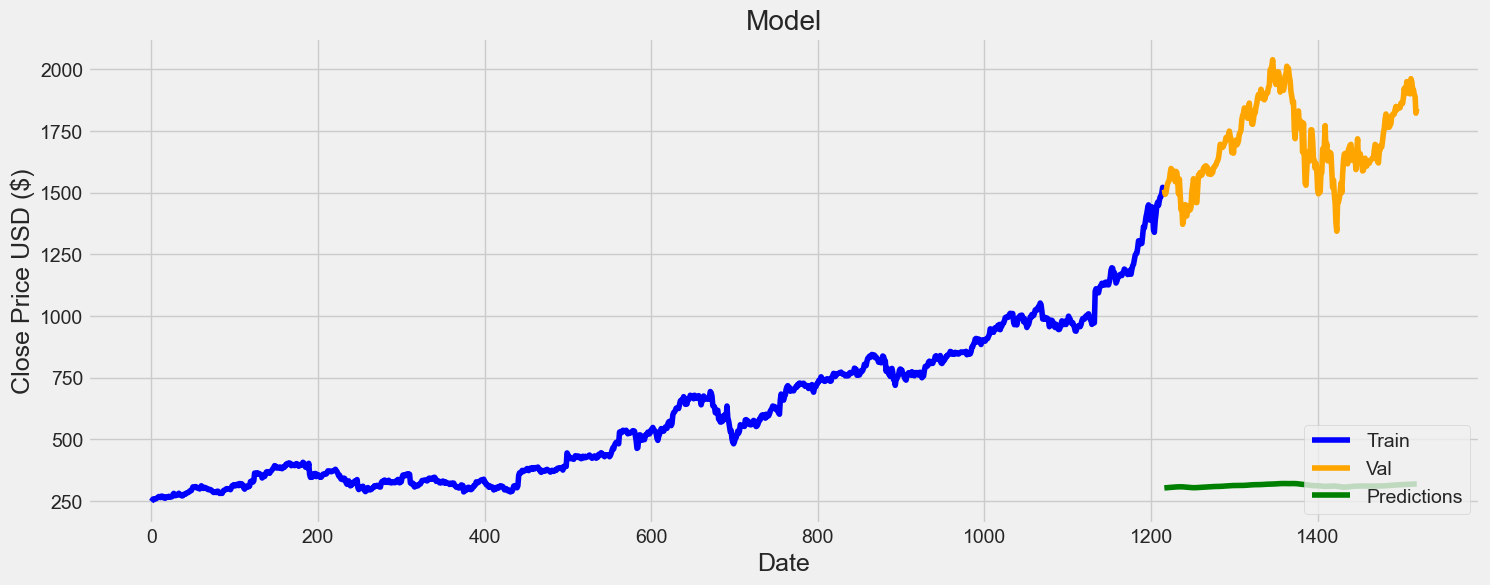

Train shape: (1216, 1)
Valid shape: (304, 2)
Predictions shape: (304,)


In [90]:
import matplotlib.pyplot as plt

# Split the data into training and validation sets
train = data[:training_data_len]
valid = data[training_data_len:]

# Ensure predictions are 1D (if necessary) and match the length of the valid set
if predictions.ndim > 1:
    predictions = predictions.flatten()  # Convert to 1D if needed

# Check the length of predictions and valid
if len(predictions) != len(valid):
    print(f"Length mismatch: predictions {len(predictions)} vs valid {len(valid)}")
else:
    valid['Predictions'] = predictions  # Assign predictions to the valid DataFrame

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training data and validation data
plt.plot(train['AMZN'], label='Train', color='blue')
plt.plot(valid['AMZN'], label='Val', color='orange')
plt.plot(valid['Predictions'], label='Predictions', color='green')

plt.legend(loc='lower right')
plt.show()
print("Train shape:", train.shape)
print("Valid shape:", valid.shape)
print("Predictions shape:", predictions.shape)



In [74]:
# Save the plot as an image file
plt.savefig('stock_prices_plot.png', dpi=300)
print("Plot saved as stock_prices_plot.png")


Plot saved as stock_prices_plot.png


<Figure size 640x480 with 0 Axes>

In [105]:
# Check the columns in the DataFrame
print("Columns in portfolio_data:", portfolio_data.columns.tolist())


Columns in portfolio_data: ['Adj Close AMZN', 'Close AMZN', 'High AMZN', 'Low AMZN', 'Open AMZN', 'Volume AMZN', 'Ticker', 'Adj Close BTC-USD', 'Close BTC-USD', 'High BTC-USD', 'Low BTC-USD', 'Open BTC-USD', 'Volume BTC-USD', 'Ticker', 'Adj Close NFLX', 'Close NFLX', 'High NFLX', 'Low NFLX', 'Open NFLX', 'Volume NFLX', 'Ticker', 'Adj Close DPZ', 'Close DPZ', 'High DPZ', 'Low DPZ', 'Open DPZ', 'Volume DPZ', 'Ticker', 'AMZN Daily Return', 'BTC-USD Daily Return', 'NFLX Daily Return', 'DPZ Daily Return']


In [106]:
# Strip leading/trailing spaces from column names
portfolio_data.columns = portfolio_data.columns.str.strip()


In [107]:
# Remove predictions_df creation if not needed
# If you still need to save predictions, make sure to adjust this section accordingly
# Example: just saving predictions directly if not creating a DataFrame
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1))  # Reshape to 2D for scaler

# Directly save predictions to a CSV file if you don't need a DataFrame
# This is just an example; ensure it fits your actual implementation
pd.DataFrame({'Predicted Price': predicted_prices.flatten()}).to_csv('predicted_prices.csv', index=False)
print("Predictions saved to predicted_prices.csv")



Predictions saved to predicted_prices.csv


In [109]:
# Show the valid and predicted prices
valid


,AMZN,Predictions
1216,1512.449951,303.271210
1217,1493.449951,303.587128
1218,1500.250000,303.848633
1219,1523.609985,304.176361
1220,1537.640015,304.503326
...,...,...
1515,1917.770020,318.921844
1516,1899.869995,319.125946
1517,1889.979980,319.252625
1518,1822.680054,319.390808


In [110]:
def fetch_stock_data(symbols, start_date, end_date):
    """
    Fetch adjusted close prices for given stock symbols from Yahoo Finance.

    Parameters:
    symbols (list): List of stock symbols to fetch data for.
    start_date (str): Start date for data retrieval.
    end_date (str): End date for data retrieval.

    Returns:
    pd.DataFrame: DataFrame containing adjusted close prices.
    """
    closing_df = yf.download(symbols, start=start_date, end=end_date)['Adj Close']
    return closing_df
